In [1]:
import cv2
import matplotlib.pyplot as plt

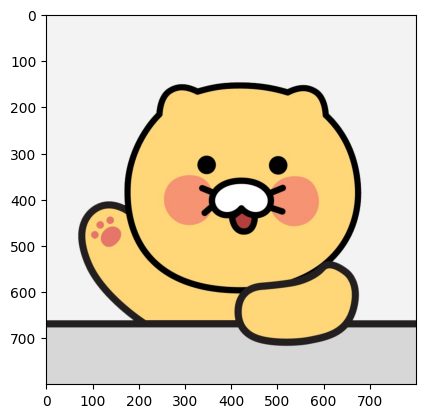

In [2]:
# cv.2.IMREAD_COLOR : 이미지를 컬러로 읽어들임
# cv2.IMREAD_GRAYSCALE : 이미지를 흑백으로 읽어들임
# cv2.IMREAD_UNCHANGED : 이미지를 알파 채널(투명도 채널)까지 포함하여 읽어들임
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
px = img_basic[500, 500]
# B, G, R 순서로 출력
px

array([120, 215, 255], dtype=uint8)

In [4]:
# G만 출력
px[1]

215

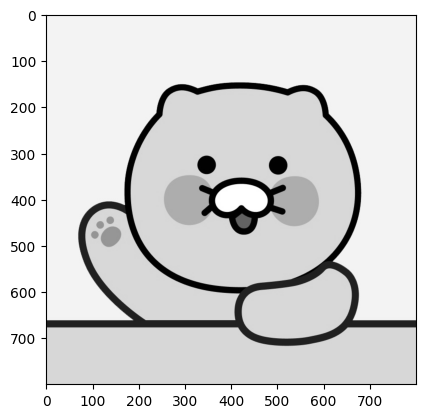

In [5]:
img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

In [6]:
print(img_basic.shape)
print(img_basic.size)

(800, 800)
640000


In [7]:
px = img_basic[550, 400]
px

216

--- 0.0029897689819335938 seconds ---
--- 0.0 seconds ---


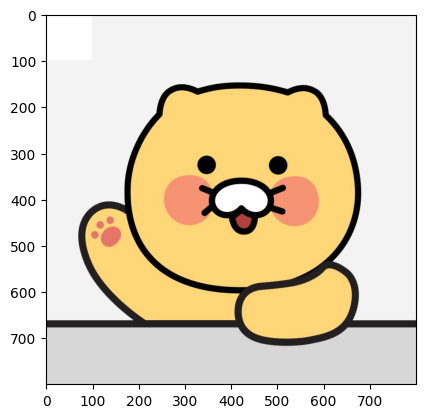

In [8]:
import time

img_basic = cv2.imread('../assets/cs.jpg')

start_time = time.time()
for i in range(0, 100):
    for j in range(0, 100):
        img_basic[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
img_basic[0:100, 0:100] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

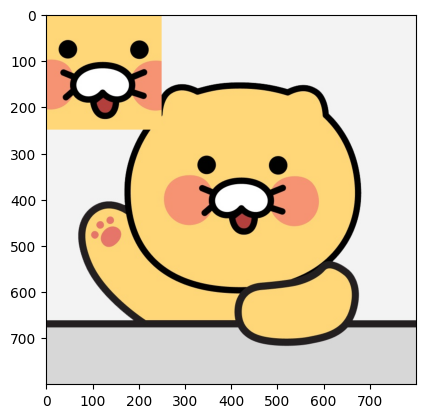

In [9]:
img_basic = cv2.imread('../assets/cs.jpg', cv2.IMREAD_UNCHANGED)

# ROI(Region of Interest, 관심 영역) 설정
# 필터링하거나 어떤 식으로든 연산을 수행하려는 영상의 부분
# [y범위, x범위]
roi = img_basic[250:500, 300:550]
img_basic[0:250, 0:250] = roi

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

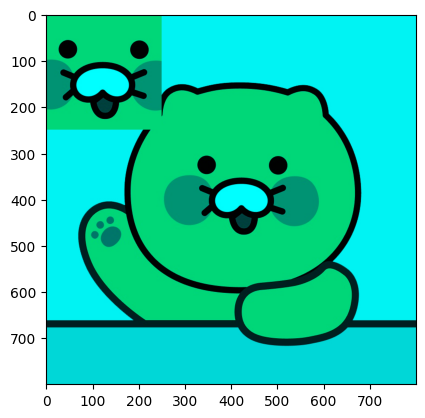

In [10]:
img_basic[:, :, 2] = 0

plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

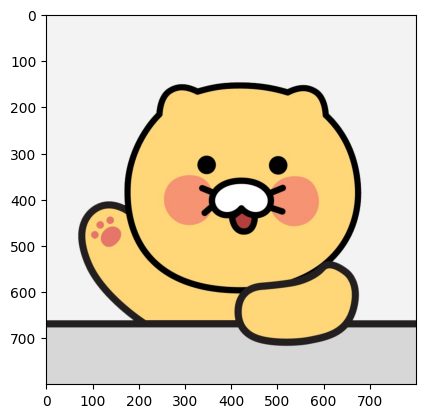

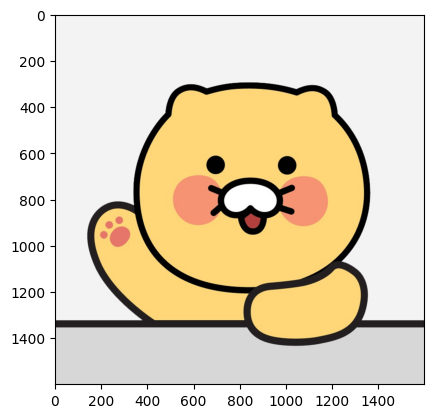

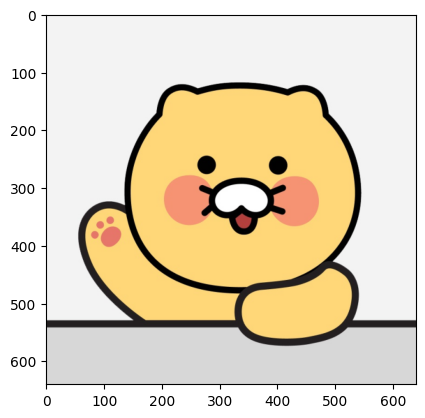

In [19]:
# 이미지 사이즈 변경

img_basic = cv2.imread('../assets/cs.jpg')
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(img_basic, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(img_basic, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

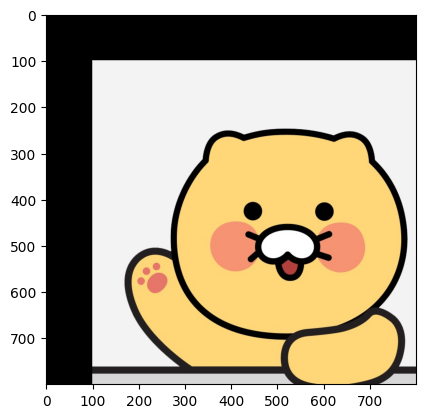

In [25]:
import numpy as np

img_basic = cv2.imread('../assets/cs.jpg')

# 행과 열 정보만 저장
height, width = img_basic.shape[:2]

M = np.float32([[1, 0, 100], [0, 1, 100]])

# 이동 변환을 표현하는 어파인 변환 행렬
dst = cv2.warpAffine(img_basic, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

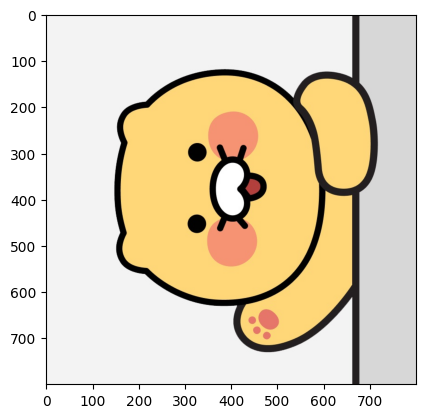

In [29]:
img_basic = cv2.imread('../assets/cs.jpg')

# 행과 열 정보만 저장
height, width = img_basic.shape[:2]

# cv2.getRotationMatrix2D(center, angle, scale) : 이미지 회전을 위한 변환 행렬을 생성
M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 1)
dst = cv2.warpAffine(img_basic, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

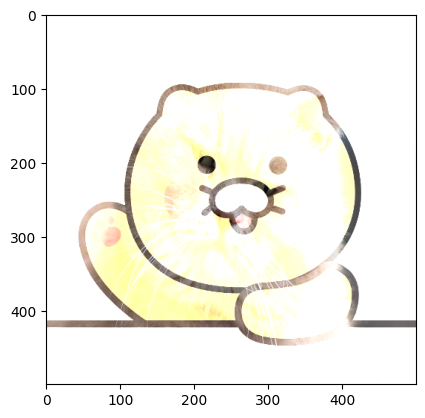

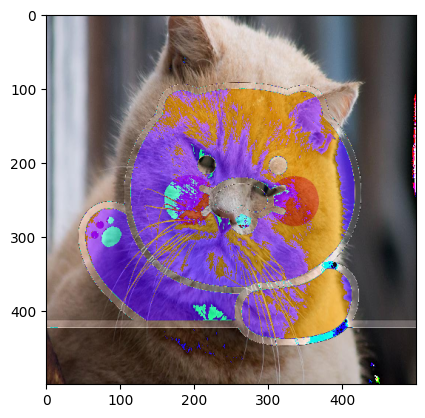

In [31]:
# cv2.add(): Saturation 연산
# 0보다 작으면 0, 255보다 크면 255로 표현

# np.add() : Modulo 연산
# 256은 0, 257은 1로 표현

image_1 = cv2.imread('../assets/cs.jpg')
image_2 = cv2.imread('../assets/cc.jpg')

# 두 이미지를 같은 사이즈로 변환
image_1 = cv2.resize(image_1, (500, 500), interpolation=cv2.INTER_CUBIC)
image_2 = cv2.resize(image_2, (500, 500), interpolation=cv2.INTER_CUBIC)

result = cv2.add(image_1, image_2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

result = image_1 + image_2
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()